<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/sine_training_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow version installed,2.9.2
keras version installed,2.9.0
numpy version installed,1.21.6
matplotlib version installed, 3.2.2
629 points plotting
Epoch 1/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 2/300
20/20 [==============================] - 0s 1ms/step - loss: 0.2731
Epoch 3/300
20/20 [==============================] - 0s 1ms/step - loss: 0.1900
Epoch 4/300
20/20 [==============================] - 0s 1ms/step - loss: 0.1546
Epoch 5/300
20/20 [==============================] - 0s 1ms/step - loss: 0.1454
Epoch 6/300
20/20 [==============================] - 0s 1ms/step - loss: 0.1402
Epoch 7/300
20/20 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 8/300
20/20 [==============================] - 0s 1ms/step - loss: 0.1344
Epoch 9/300
20/20 [==============================] - 0s 1ms/step - loss: 0.1271
Epoch 10/300
20/20 [==============================] - 0s 2ms/step - loss: 0.1234
Epoch 11/300
20/20 [===========================

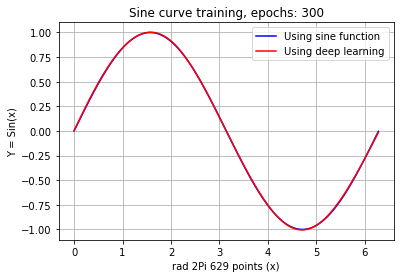

Here is what i learn:[array([[ 0.17835973,  0.21541706,  0.12431468,  0.16458048,  0.32524607,
        -0.12291049, -0.13899554,  0.121252  ,  0.13223605,  0.34177655,
        -0.20058616,  0.20823683,  0.4036295 , -0.07301151, -0.718609  ,
        -0.2225184 ,  0.23969845,  0.46082544,  0.37695128,  0.33778536,
        -0.11284368, -0.40402624,  0.42855534, -0.15321139,  0.17759062,
        -0.11419013, -0.4920024 ,  0.304291  ,  0.3502449 , -0.7126525 ,
         0.73134375,  0.13502897]], dtype=float32), array([-0.7949694 , -0.58106494,  0.00653051, -0.6566655 , -0.2177371 ,
        0.24962866,  0.4704408 , -0.23665865, -0.40580982, -0.16179301,
        0.29988113, -0.47972888, -0.19907768, -0.00968659, -0.17642316,
        0.17348824, -0.12743714,  0.07317013, -0.51732063, -0.17619103,
        0.13197215,  0.859787  ,  0.1609523 ,  0.5590386 , -0.7622944 ,
        0.130624  , -0.07476778, -0.18892647, -0.19286594, -0.11268967,
        0.0715424 , -0.3756622 ], dtype=float32)]


In [10]:
'''
One neural one layer
Learning Sine function

'''
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
tf.config.experimental.set_visible_devices([],'GPU')    # run on GPU

# Module Version
print(f"tensorflow version installed,{tf.__version__}")
print(f"keras version installed,{tf.keras.__version__}")
print(f"numpy version installed,{np.__version__}")
print("matplotlib version installed,",mp.__version__)

pi = np.pi                           # 3.14169256
act_fun = "tanh" # sin函數這種"平滑線"激勵函數建議使用例如tanh
hidden = 32 # 增加神經元數量增強模型擬合能力
neu = Dense(units = hidden, input_shape = [1],activation = act_fun)
neu2 = Dense(units = hidden, input_shape = [hidden],activation = act_fun)
neu3 = Dense(units = 1, input_shape = [hidden],activation = None)
model = Sequential([neu,neu2,neu3])#增加層數正所謂"深度學習"
model.compile(optimizer='adam', loss='mean_squared_error') #使用adam比sgd更快收斂

# Data for plotting sine function

x = np.arange(0.0, 2*pi, 0.01)       # from radians 0.0 to 2pi, interval 0.01
y = np.sin(x)                        # range from -1:1
# y = (np.sin(x)+1)/2                # normalize sin between 0:1 for sigmoid

print(f"{len(x)} points plotting")
epochsNo = 300 # 200 調升至 300 訓練久一些讓模型loss降低更多
model.fit(x , y , epochs = epochsNo)
print("--------------guess from here------------------------")
y_pred = model.predict(x)
print(y_pred.shape)
    

#plotting
fig, ax = plt.subplots()
ax.plot(x,y,color='blue',label='Using sine function')
ax.plot(x,y_pred,color='red',label='Using deep learning')

ax.set(xlabel='rad 2Pi '+str(len(x))+' points (x)', ylabel='Y = Sin(x)',
       title='Sine curve training, epochs: '+ str(epochsNo))
ax.grid()
filename = "sin_epochs" + str(epochsNo) + ".png"
fig.savefig(filename)
ax.legend()
plt.show()

print(f"Here is what i learn:{neu.get_weights()}")
